# Paket Prabayar Manakah yang Lebih Baik?

## Pendahuluan:

Proyek ini bertujuan untuk menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan, serta melakukan pengujian dua hipotesis, yaitu :

- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

### Tujuan: 
1. Menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan.
2. Menguji hipotesis bahwa pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
3. Menguji hipotesis bahwa pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

### Tahapan:
Proyek ini akan terdiri dari beberapa tahap utama, yaitu:
1. Ikhtisar Data : Membaca file dan melakukan eksplorasi data
2. Pra-pemrosesan data : 
- Mengidentifikasi dan mengisi nilai-nilai yang hilang
- Memperbaiki tipe data
- Memperbaiki kualitas data
3. Mengagregasikan Data per Pengguna
4. Mempelajari Perilaku Pengguna
5. Menganalisa Pendapatan Kedua Paket Prabayar
6. Menguji Hipotesis

## Inisialisasi

Memuat semua *library* yang dibutuhkan.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import math
import numpy as np

## Memuat Data

Memuat semua data proyek untuk membaca informasi umumnya.

In [6]:
try:
    df_calls = pd.read_csv('megaline_calls.csv')
    df_internet = pd.read_csv('megaline_internet.csv')
    df_messages = pd.read_csv('megaline_messages.csv')
    df_plans = pd.read_csv('megaline_plans.csv')
    df_users = pd.read_csv('megaline_users.csv')
except:
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_messages = pd.read_csv('/datasets/megaline_messages.csv')
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')
    df_users = pd.read_csv('/datasets/megaline_users.csv')


## Mempersiapkan Data

Data untuk proyek ini terbagi menjadi lima tabel yang berbeda. Masing-masing tabel akan dilakukan eksplorasi awal terlebih dahulu dan dilakukan koreksi di setiap tabel jika memang diperlukan sebagai tahap awal pra-pemrosesan data.

## Paket Prabayar

In [7]:
df_plans.info()
df_plans.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


(2, 8)

In [8]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Memeriksa nilai yang hilang.

In [9]:
df_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Memeriksa nilai yang terduplikasi

In [10]:
df_plans.duplicated().sum()

0

Pada table pertama yang berisikan informasi mengenai detail harga dari dua paket prabayar Megaline ini, tidak terdapat masalah yang berarti pada data. Tidak terdapat juga adanya nilai yang terduplikasi ataupun nilai yang hilang setelah dilakukan permeriksaan. Ini kemungkinan disebabkan oleh hanya terdapat dua baris pada table data tersebut. Untuk itu, tidak perlu dilakukan perbaikan apapun untuk table data pertama ini.

## Pengguna

In [11]:
df_users.info()
df_users.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(500, 8)

In [12]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Memeriksa nilai yang hilang.

In [13]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Memeriksa nilai yang terduplikasi.

In [14]:
df_users.duplicated().sum()

0

Dari pemeriksaan data awal pada table berisikan informasi data pengguna, terdapat beberapa masalah, yaitu : nilai yang hilang di kolom `churn_date`, tipe data yang tidak sesuai pada kolom `reg_date`, dan `churn_date`. Untuk memperbaiki masalah ini, dua kolom dengan tipe data yang tidak sesuai akan diubah menjadi tipe data waktu tanggal, sedangkan nilai yang hilang di kolom `churn_date` akan diisi dengan nilai yang sama dari kolom `reg_date`, mengingat nilai yang hilang disebabkan oleh para pengguna yang masih aktif menggunakan paket pra-bayar pada saat data ini dikumpulkan.

### Memperbaiki Data

Memperbaiki tipe data dikolom `reg_date` dan `churn_date` menjadi tipe data waktu & tanggal.

In [15]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [16]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

Mengisi nilai yang hilang pada kolom `churn_date` dengan data pada kolom `reg_date` dari baris yang sama.

In [17]:
df_users.loc[df_users['churn_date'].isna(), 'churn_date'] = df_users.loc[df_users['churn_date'].isna(), 'reg_date']

Memeriksa informasi umum data setelah dilakukan perbaikan, untuk memastikan sudah tidak ada nilai yang hilang dan tipe data sudah sesuai.

In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Panggilan

In [19]:
df_calls.info()
df_calls.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


(137735, 4)

In [20]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Memeriksa nilai yang hilang.

In [21]:
df_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Memeriksa nilai yang terduplikasi.

In [22]:
df_calls.duplicated().sum()

0

Dari pemeriksaan data awal diatas, terdapat kesalahan pada tipe data kolom `call_date` yang seharusnya berupa data waktu & tanggal. 

### Memperbaiki Data

Sebelumnya telah diinformasikan bahwa terdapat panggilan dengan durasi 0 menit pada kolom `duration`. Untuk itu, perlu dilakukan pemeriksaan lebih lanjut untuk mengetahui jumlah panggilan dengan durasi 0 menit, untuk memutuskan metode untuk memperbaiki hal ini. 

In [23]:
zerominute_duration = len(df_calls.loc[df_calls['duration'] == 0]) / len(df_calls['duration'])
print("Persentase nilai durasi panggilan 0 menit : {:.2f}%".format(zerominute_duration))

Persentase nilai durasi panggilan 0 menit : 0.19%


In [24]:
count = (df_calls['duration'] == 0).sum()
print('Jumlah nilai durasi panggilan 0 menit :', count)

Jumlah nilai durasi panggilan 0 menit : 26834


Karena terdapat sedikit jumlah baris (dibandingkan jumlah total baris) dengan data durasi panggilan 0 menit, akan dilakukan penghapusan untuk data tersebut agar mempermudah saat melakukan proses analisa pada tahapan selanjutnya.

In [25]:
df_calls = df_calls[df_calls['duration'] != 0]

Memperbaiki tipe data pada kolom `call_date` menjadi tipe data waktu & tanggal.

In [26]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Memeriksa informasi umum dari table setelah dilakukan perbaikan, untuk memastikan tipe data sudah diperbaiki.

In [27]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Memperkaya Kualitas Data

Sebagai faktor pendukung pada data, beberapa kolom akan ditambahkan untuk mempermudah proses analisa.

Menambahkan kolom `month` pada data yang berisikan informasi bulan saat panggilan dilakukan.

In [28]:
df_calls['month'] = df_calls['call_date'].dt.month

Menambahkan kolom `total_calls` pada data yang berisikan informasi jumlah panggilan yang dilakukan tiap pengguna per bulannya.

In [29]:
grouped_calls = df_calls.groupby(['user_id', 'month']).size().reset_index(name='total_calls')
df_calls = df_calls.merge(grouped_calls, on=['user_id', 'month'], how='left')

Menambahkan kolom `minutes_percall` pada data yang berisikan informasi durasi tiap panggilan dalam menit yang telah dibulatkan keatas, sesuai ketentuan operator Megaline.

In [30]:
df_calls['minutes_percall'] = df_calls['duration'].apply(math.ceil)

Menambahkan kolom `monthly_minutes` pada data yang berisikan informasi total durasi menit panggilan yang dilakukan tiap pengguna per bulannya.

In [31]:
grouped_duration = df_calls.groupby(['user_id', 'month'])['minutes_percall'].sum().reset_index(name='monthly_minutes')
df_calls = df_calls.merge(grouped_duration, on=['user_id', 'month'], how='left')

Memeriksa data setelah kolom baru ditambahkan.

In [32]:
df_calls

,id,user_id,call_date,duration,month,total_calls,minutes_percall,monthly_minutes
0,1000_93,1000,2018-12-27,8.52,12,16,9,124
1,1000_145,1000,2018-12-27,13.66,12,16,14,124
2,1000_247,1000,2018-12-27,14.48,12,16,15,124
3,1000_309,1000,2018-12-28,5.76,12,16,6,124
4,1000_380,1000,2018-12-30,4.22,12,16,5,124
...,...,...,...,...,...,...,...,...
110896,1499_199,1499,2018-11-21,8.72,11,39,9,308
110897,1499_200,1499,2018-10-20,10.89,10,41,11,385
110898,1499_201,1499,2018-09-21,8.12,9,35,9,346
110899,1499_202,1499,2018-10-10,0.37,10,41,1,385


Memeriksa informasi umum dari data setelah kolom baru ditambahkan.

In [33]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 110900
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               110901 non-null  object        
 1   user_id          110901 non-null  int64         
 2   call_date        110901 non-null  datetime64[ns]
 3   duration         110901 non-null  float64       
 4   month            110901 non-null  int64         
 5   total_calls      110901 non-null  int64         
 6   minutes_percall  110901 non-null  int64         
 7   monthly_minutes  110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 7.6+ MB


## Pesan/SMS

In [34]:
df_messages.info()
df_messages.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


(76051, 3)

In [35]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Memeriksa nilai yang hilang.

In [36]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

Memeriksa nilai yang terduplikasi.

In [37]:
df_messages.duplicated().sum()

0

Dari pemeriksaan data awal diatas, terdapat kesalahan pada tipe data kolom `message_date` yang seharusnya berupa data waktu & tanggal. 

### Memperbaiki Data

Memperbaiki tipe data kolom `message_date` menjadi tipe data tanggal & waktu.

In [38]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

Memeriksa informasi umum setelah dilakukan perbaikan data.

In [39]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Memperkaya Kualitas Data

Sebagai faktor pendukung, beberapa kolom akan ditambahkan yang akan berguna untuk proses analisa.

Menambahkan kolom `month` yang berisikan informasi mengenai bulan saat pesan dikirimkan.


In [40]:
df_messages['month'] = df_messages['message_date'].dt.month

Menambahkan kolom `total_messages` yang berisikan informasi mengenai jumlah pesan yang dikirim tiap pengguna per bulannya.

In [41]:
grouped_messages = df_messages.groupby(['user_id', 'month']).size().reset_index(name='total_messages')
df_messages = df_messages.merge(grouped_messages, on=['user_id', 'month'], how='left')

In [42]:
df_messages.head(15)

,id,user_id,message_date,month,total_messages
0,1000_125,1000,2018-12-27,12,11
1,1000_160,1000,2018-12-31,12,11
2,1000_223,1000,2018-12-31,12,11
3,1000_251,1000,2018-12-27,12,11
4,1000_255,1000,2018-12-26,12,11
5,1000_346,1000,2018-12-29,12,11
6,1000_386,1000,2018-12-30,12,11
7,1000_413,1000,2018-12-31,12,11
8,1000_502,1000,2018-12-27,12,11
9,1000_525,1000,2018-12-28,12,11


In [43]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              76051 non-null  object        
 1   user_id         76051 non-null  int64         
 2   message_date    76051 non-null  datetime64[ns]
 3   month           76051 non-null  int64         
 4   total_messages  76051 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 3.5+ MB


## Internet

In [44]:
df_internet.info()
df_internet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


(104825, 4)

In [45]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Memeriksa nilai yang hilang.

In [46]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Memeriksa nilai yang terduplikasi.

In [47]:
df_internet.duplicated().sum()

0

Dari pengamatan awal diatas, tipe data pada kolom `session_date` tidak sesuai dengan yang seharusnya.

### Memperbaiki Data

Memperbaiki kolom `session_date` menjadi tipe data waktu & tanggal.

In [48]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Memeriksa informasi umum setelah data diperbaiki.

In [49]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Memperkaya Kualitas Data

Menambahkan faktor pendukung pada data yang akan berguna untuk proses analisa.

Menambahakan kolom `month` yang berisi informasi mengenai bulan saat penggunaan paket data internet digunakan.

In [50]:
df_internet['month'] = df_internet['session_date'].dt.month

Menambahkan kolom `total_mb` yang berisikan informasi mengenai total data internet dalam MB yang digunakan tiap pengguna per bulannya.

In [51]:
grouped_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb')
df_internet = df_internet.merge(grouped_internet, on=['user_id', 'month'], how='left')

Memeriksa data, setelah kolom ditambahkan.

In [52]:
df_internet

,id,user_id,session_date,mb_used,month,total_mb
0,1000_13,1000,2018-12-29,89.86,12,1901.47
1,1000_204,1000,2018-12-31,0.00,12,1901.47
2,1000_379,1000,2018-12-28,660.40,12,1901.47
3,1000_413,1000,2018-12-26,270.99,12,1901.47
4,1000_442,1000,2018-12-27,880.22,12,1901.47
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,19492.43
104821,1499_216,1499,2018-12-30,304.72,12,22059.21
104822,1499_217,1499,2018-09-22,292.75,9,12984.76
104823,1499_218,1499,2018-12-07,0.00,12,22059.21


Memeriksa informasi umum data, setelah kolom ditambahkan.

In [53]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   total_mb      104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 5.6+ MB


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Menampilkan informasi paket guna memeriksa persyaratannya sekali lagi.

In [54]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Mengagregasi Data per Pengguna

Mengagregasikan data setiap pengguna per periode untuk membuat satu catatan per pengguna per periode, guna memudahkan analisis lebih lanjut.

Menyatukan data agregat ke dalam satu DataFrame untuk menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu.

Menggabungkan data panggilan & menit dengan tabel data pengguna sebagai data table baru (df_merged). Setelah itu, menambahkan data total SMS ke df_merged, yang seluruh penggabungan dilakukan berdasarkan kolom `user_id`, dan `month`. Mengingat data pada tabel Panggilan dan Pesan masih terdapat pengulangan untuk tiap data bulanan yang sudah dihitung pada tahap sebelumnya, dilakukan `drop_duplicates()` untuk menghilangkan nilai-nilai yang terduplikasi.

In [55]:
df_merged = df_users.merge(df_calls[['user_id', 'month', 'total_calls', 'monthly_minutes']], on=['user_id'], how='outer')
df_merged = df_merged.merge(df_messages[['user_id', 'month', 'total_messages']], on=['user_id', 'month'], how='outer')

df_merged = df_merged.drop_duplicates()

df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,monthly_minutes,total_messages
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24,12.0,16.0,124.0,11.0
176,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08-13,9.0,38.0,315.0,44.0
1848,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08-13,10.0,47.0,393.0,53.0
4339,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08-13,12.0,46.0,412.0,44.0
6363,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08-13,11.0,49.0,426.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4191615,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaT,11.0,NaN,NaN,72.0
4191687,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaT,12.0,NaN,NaN,61.0
4191748,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaT,5.0,NaN,NaN,2.0
4191750,1407,NaN,NaN,NaN,NaN,NaT,NaN,NaT,11.0,NaN,NaN,1.0


Menggabungkan data internet ke table df_merged, berdasarkan `kolom user_id`, dan `month`. 
Dilakukan drop_duplicates() untuk menghilangkan nilai-nilai yang terduplikasi, mengingat data pada tabel Internet masih terdapat pengulangan untuk tiap data bulanan yang sudah dihitung pada tahap sebelumnya.

In [56]:
df_merged = df_merged.merge(df_internet[['user_id', 'month', 'total_mb']], on=['user_id', 'month'], how='outer')

df_merged = df_merged.drop_duplicates().reset_index(drop=True)

Mengisi nilai Nan dengan `Unknown`, untuk kolom tanpa nilai numerik.

In [57]:
columns_to_fill = ['first_name', 'last_name', 'city', 'plan']
df_merged[columns_to_fill] = df_merged[columns_to_fill].fillna('Unknown')

Mengisi nilai Nan dengan `0`, yang berarti user tidak menggunakan feature tersebut di bulan tersebut. 

In [58]:
df_merged = df_merged.fillna(0) 

Mengubah kembali tipe data angka menjadi bilangan bulat, dan menampilkan informasi umum table.

In [59]:
columns_tobe_fixed = ['age', 'month', 'total_calls', 'monthly_minutes', 'total_messages']

for column in columns_tobe_fixed :
    df_merged[column] = df_merged[column].astype(int)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2312 non-null   int64  
 1   first_name       2312 non-null   object 
 2   last_name        2312 non-null   object 
 3   age              2312 non-null   int32  
 4   city             2312 non-null   object 
 5   reg_date         2312 non-null   object 
 6   plan             2312 non-null   object 
 7   churn_date       2312 non-null   object 
 8   month            2312 non-null   int32  
 9   total_calls      2312 non-null   int32  
 10  monthly_minutes  2312 non-null   int32  
 11  total_messages   2312 non-null   int32  
 12  total_mb         2312 non-null   float64
dtypes: float64(1), int32(5), int64(1), object(6)
memory usage: 189.8+ KB


Memastikan sudah tidak ada nilai yang hilang.

In [60]:
df_merged.isna().sum()

user_id            0
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date         0
month              0
total_calls        0
monthly_minutes    0
total_messages     0
total_mb           0
dtype: int64

Memastikan sudah tidak ada nilai duplikat.

In [61]:
df_merged.duplicated().sum()

0

Menampilkan data yang telah diagregasi dan dibersihkan.

In [62]:
df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,monthly_minutes,total_messages,total_mb
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,ultimate,2018-12-24 00:00:00,12,16,124,11,1901.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,9,38,315,44,13314.82
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,10,47,393,53,22330.49
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,12,46,412,44,19369.18
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,11,49,426,36,18504.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1407,Unknown,Unknown,0,Unknown,0,Unknown,0,11,0,0,1,290.06
2308,1482,Unknown,Unknown,0,Unknown,0,Unknown,0,10,0,0,2,0.00
2309,1094,Unknown,Unknown,0,Unknown,0,Unknown,0,10,0,0,0,1728.71
2310,1108,Unknown,Unknown,0,Unknown,0,Unknown,0,12,0,0,0,233.17


Menambahkan informasi paket prabayar, mengenai biaya paket per bulannya.

In [63]:
def usd_monthly_pay(plan):
   
    if 'surf' in plan:
        return 20
    elif 'ultimate' in plan:
        return 70
    else:
        return 0

In [64]:
usd_monthly_pay('surf')

20

Menambahkan informasi paket prabayar, mengenai biaya tambahan penggunaan paket data internet per GB diluar pemakaian paket.

In [65]:
def usd_per_gb(plan):

    if 'surf' in plan:
        return 10
    elif 'ultimate' in plan:
        return 7
    else:
        return 0

In [66]:
usd_per_gb('ultimate')

7

Menambahkan informasi paket prabayar, mengenai biaya tambahan tiap SMS yang dikirimkan diluar pemakaian paket.

In [67]:
def usd_per_message(plan):
    
    if 'surf' in plan:
        return 0.03
    elif 'ultimate' in plan:
        return 0.01
    else:
        return 0

In [68]:
usd_per_message('ultimate')

0.01

Menambahkan informasi paket prabayar, mengenai biaya tambahan tiap panggilan per menit diluar pemakaian paket.

In [69]:
def usd_per_minute(plan):

    if 'surf' in plan:
        return 0.03
    elif 'ultimate' in plan:
        return 0.01
    else:
        return 0

In [70]:
usd_per_minute('surf')

0.03

Menambahkan seluruh empat kondisi diatas sebagai kolom baru di table df_merged.

In [71]:
added_columns = ['usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
added_values = [usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute]

for column, value in zip(added_columns, added_values):
    df_merged[column] = df_merged['plan'].apply(value)

df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,monthly_minutes,total_messages,total_mb,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,ultimate,2018-12-24 00:00:00,12,16,124,11,1901.47,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,9,38,315,44,13314.82,20,10,0.03,0.03
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,10,47,393,53,22330.49,20,10,0.03,0.03
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,12,46,412,44,19369.18,20,10,0.03,0.03
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,11,49,426,36,18504.30,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1407,Unknown,Unknown,0,Unknown,0,Unknown,0,11,0,0,1,290.06,0,0,0.00,0.00
2308,1482,Unknown,Unknown,0,Unknown,0,Unknown,0,10,0,0,2,0.00,0,0,0.00,0.00
2309,1094,Unknown,Unknown,0,Unknown,0,Unknown,0,10,0,0,0,1728.71,0,0,0.00,0.00
2310,1108,Unknown,Unknown,0,Unknown,0,Unknown,0,12,0,0,0,233.17,0,0,0.00,0.00


Tahap selanjutunya yaitu, menghitung pendapatan bulanan dari setiap pengguna, dengan cara, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; tambahkan biaya bulanan berdasarkan pada jenis paket panggilan. 

Maka dari itu, beberapa table akan ditambahkan, yang berisikan informasi mengenai biaya tambahan yang harus dibayarkan tiap pengguna berdasarkan paket yang mereka gunakan serta tingkat konsumsi masing-masing aktifitas.

Pertama, menambahkan kolom `call_charges` yang menginformasikan biaya tambahan panggilan yang dilakukan diluar paket per menit.

In [72]:
def call_charges(row):
    plan = row['plan']
    monthly_minutes = row['monthly_minutes']
    usd_per_minute = row['usd_per_minute']
    
    if plan == 'surf':
        if monthly_minutes <= 500:
            return 0
        else:
            return (monthly_minutes - 500) * usd_per_minute
        
    elif plan == 'ultimate':
        if monthly_minutes <= 3000:
            return 0
        else:
            return (monthly_minutes - 3000) * usd_per_minute
    
    else:
        return 0 

Kedua, menambahkan kolom `text_charges` yang menginformasikan biaya tambahan SMS yang dilakukan diluar paket per pesan.

In [73]:
def text_charges(row):
    plan = row['plan']
    total_messages = row['total_messages']
    usd_per_message = row['usd_per_message']
    
    if plan == 'surf':
        if total_messages <= 50:
            return 0
        else:
            return (total_messages - 50) * usd_per_message
    
    elif plan == 'ultimate':
        if total_messages <= 1000:
            return 0
        else:
            return (total_messages - 1000) * usd_per_message
    
    else:
        return 0 

Ketiga, menambahkan kolom `gb_charges` yang menginformasikan biaya tambahan penggunaan internet yang dilakukan diluar paket per GB. Mengingat terdapat suatu kondisi dari operator Megaline dimana pemakaian paket akan dibulatkan keatas per GB, maka perhitungan total GB dilakukan dengan membagi 1000 tiap hasil dari total_mb yang dikurangi masing-masing jumlah paket dalam mb, lalu hasilnya dibulatkan keatas sesuai ketentuan operator untuk menghitung kelebihan GB yang dipakai pengguna.

In [74]:
def gb_charges(row):
    plan = row['plan']
    total_mb = row['total_mb']
    usd_per_gb = row['usd_per_gb']
    
    if plan == 'surf':
        if total_mb <= 15360:
            return 0
        else:
            return math.ceil((total_mb - 15360) / 1024) * usd_per_gb
    
    elif plan == 'ultimate':
        if total_mb <= 30720:
            return 0
        else:
            return math.ceil((total_mb - 30720) / 1024) * usd_per_gb
    
    else:
        return 0 

Menambahkan ketiga kondisi diatas, sebagai kolom baru di table df_merged.

In [75]:
added_columns = ['call_charges', 'text_charges', 'gb_charges']
added_values = [call_charges, text_charges, gb_charges]

for column, value in zip(added_columns, added_values):
    df_merged[column] = df_merged.apply(value, axis=1)

df_merged.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,monthly_minutes,total_messages,total_mb,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_charges,text_charges,gb_charges
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,ultimate,2018-12-24 00:00:00,12,16,124,11,1901.47,70,7,0.01,0.01,0.0,0.00,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,9,38,315,44,13314.82,20,10,0.03,0.03,0.0,0.00,0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,10,47,393,53,22330.49,20,10,0.03,0.03,0.0,0.09,70
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,12,46,412,44,19369.18,20,10,0.03,0.03,0.0,0.00,40
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,11,49,426,36,18504.30,20,10,0.03,0.03,0.0,0.00,40


Menambahkan informasi mengenai pendapatan bulanan dari tiap pengguna, dengan menjumlahkan biaya paket bulanan dan total biaya extra seluruh aktifitas pada kolom `monthly_income`.

In [76]:
pd.set_option('display.max_columns', 100)

In [77]:
df_merged['monthly_income'] = df_merged[['usd_monthly_pay', 'call_charges', 'text_charges', 'gb_charges']].sum(axis=1)
df_merged.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,monthly_minutes,total_messages,total_mb,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_charges,text_charges,gb_charges,monthly_income
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,ultimate,2018-12-24 00:00:00,12,16,124,11,1901.47,70,7,0.01,0.01,0.0,0.00,0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,9,38,315,44,13314.82,20,10,0.03,0.03,0.0,0.00,0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,10,47,393,53,22330.49,20,10,0.03,0.03,0.0,0.09,70,90.09
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,12,46,412,44,19369.18,20,10,0.03,0.03,0.0,0.00,40,60.00
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,2018-08-13 00:00:00,11,49,426,36,18504.30,20,10,0.03,0.03,0.0,0.00,40,60.00


## Mempelajari Perilaku Pengguna

Mengingat tujuan utama proyek ini adalah membandingkan paket prabayar dan memutuskan paket manakah yang lebih menguntungkan, maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket, untuk memahami perilaku pengguna.

### Panggilan

Membuat diagram batang untuk membandingkan rata-rata durasi panggilan per bulan dari tiap jenis paket.

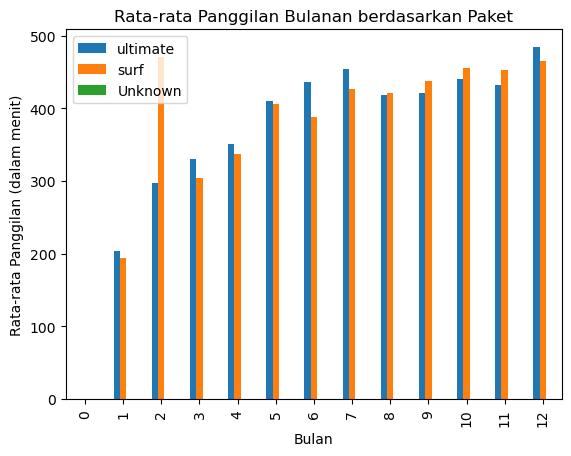

In [78]:
monthly_minutes_mean = df_merged.pivot_table(values='monthly_minutes', index=['month', 'plan'], aggfunc='mean')
monthly_minutes_mean = monthly_minutes_mean.reindex(['surf', 'ultimate', 'Unknown'], level='plan')
monthly_minutes_mean.unstack().plot(kind='bar')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Panggilan (dalam menit)')
plt.title('Rata-rata Panggilan Bulanan berdasarkan Paket')

plt.legend(df_merged['plan'].unique())
plt.show()

Dari grafik diatas, durasi panggilan dari masing-masing paket tidak terlalu jauh berbeda tiap bulannya, dan juga tidak menunjukan durasi panggilan mana yang lebih panjang antara kedua paket tersebut secara konsisten. Hanya dibulan februari durasi panggilan menunjukan perbedaan yang signifikan dimana durasi panggilan paket surf hampir 200 menit lebih banyak dibanding paket ultimate.

Membuat histogram untuk membandingkan frekuensi dari durasi panggilan tiap paket, serta menghitung masing-masing mean dan standar deviasinya.  

ultimate
Rata-rata panggilan : 431.65
Standar Deviasi : 239.60


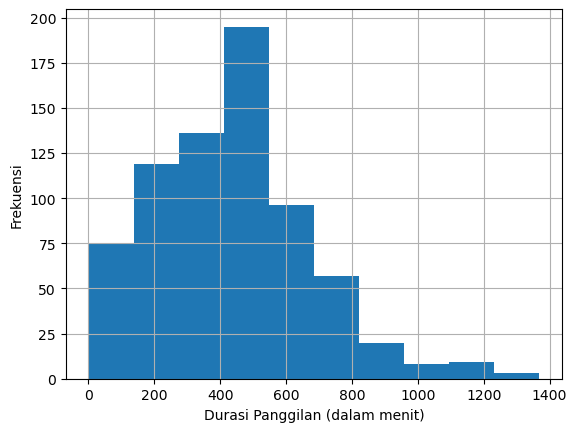

surf
Rata-rata panggilan : 433.16
Standar Deviasi : 231.49


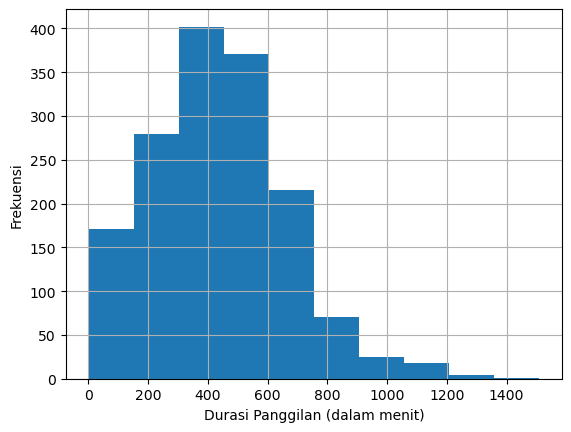

In [79]:
for plan in df_merged[df_merged['plan'] != 'Unknown']['plan'].unique():
    print(plan)
    df_minutes = df_merged.loc[df_merged['plan'] == plan]['monthly_minutes']
    print('Rata-rata panggilan : {:.2f}'.format(df_minutes.mean()))
    print('Standar Deviasi : {:.2f}'.format(np.std(df_minutes)))
    df_minutes.hist()
    
    plt.xlabel('Durasi Panggilan (dalam menit)')
    plt.ylabel('Frekuensi')
    plt.show()

Dari kedua histogram diatas, terdapat dua titik puncak yang berbeda, dimana durasi panggilan terbanyak paket ultimate berada dikisaran 500 menit, sedangkan paket surf dikisaran 400 menit. Meskipun, kedua histogram sama-sama memiliki kemiringan positif, dimana distribusi data dengan nilai yang lebih banyak berada di kanan puncak, paket surf memiliki rentang durasi panggilan yang lebih lama (>1400 menit), dibandingkan paket ultimate (<1400 menit). Hal ini menyebabkan rata-rata panggilan paket surf lebih besar daripada paket ultimate, yang mengindikasikan pengguna paket surf melakukan durasi panggilan yang lebih lama.

Membuat grafik boxplot untuk memvisualisasikan distribusi durasi panggilan.

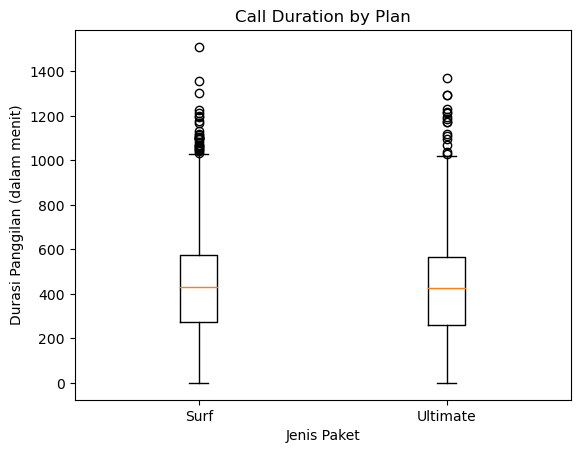

In [80]:
plt.boxplot([df_merged[df_merged['plan'] == 'surf']['monthly_minutes'], 
             df_merged[df_merged['plan'] == 'ultimate']['monthly_minutes']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Jenis Paket')
plt.ylabel('Durasi Panggilan (dalam menit)')
plt.title('Call Duration by Plan')
plt.show()

Dari grafik boxplot diatas, masing-masing pengguna dari tiap paket memiliki durasi panggilan cenderung sama. Namun, pengguna paket surf membuat durasi panggilan yang lebih banyak pada durasi >1000 menit, serta memiliki durasi yang lebih lama (>1400 menit) dibandingkan paket ultimate.

### Pesan/SMS

Membuat diagram batang untuk membandingkan rata-rata jumlah pesan per bulan dari tiap jenis paket.

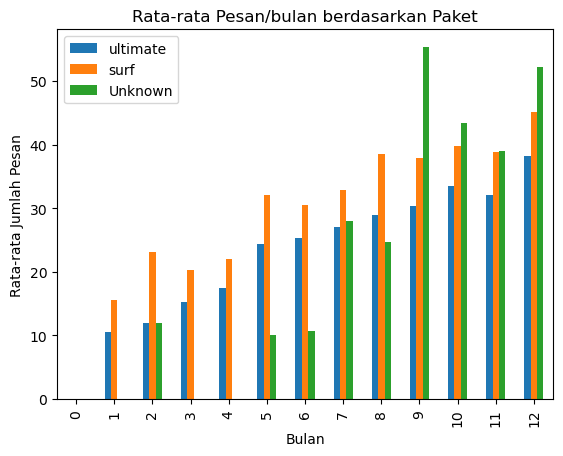

In [81]:
monthly_text_mean = df_merged.pivot_table(values='total_messages', index=['month', 'plan'], aggfunc='mean')
monthly_text_mean = monthly_text_mean.reindex(['surf', 'ultimate', 'Unknown'], level='plan')
monthly_text_mean.unstack().plot(kind='bar')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Pesan')
plt.title('Rata-rata Pesan/bulan berdasarkan Paket')

plt.legend(df_merged['plan'].unique())
plt.show()

Dari grafik diatas, rata-rata jumlah pesan yang dikirimkan pengguna paket surf lebih banyak dibandingkan paket ultimate di tiap bulannya. Namun terdapat juga nilai data yang tidak diketahui jenis paketnya, untuk mengetahui frekuensi distribusinya, akan dilihat pada histogram.

Membuat histogram untuk membandingkan frekuensi dari jumlah pesan tiap paket, serta menghitung masing-masing mean dan standar deviasinya.  

ultimate
Rata-rata Jumlah Pesan : 37.46
Standar Deviasi : 34.78


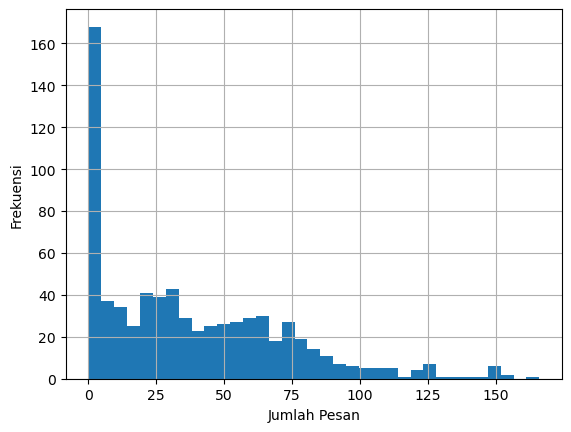

surf
Rata-rata Jumlah Pesan : 30.66
Standar Deviasi : 33.61


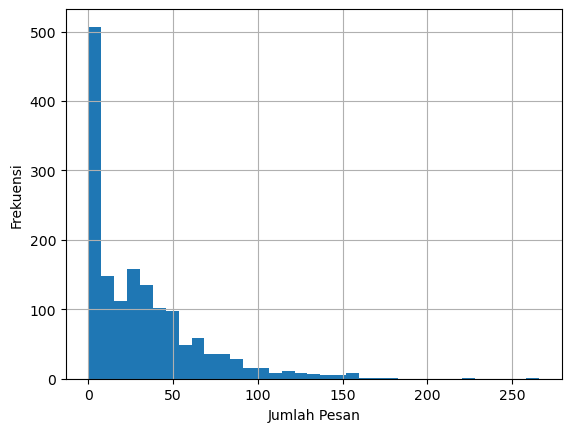

Unknown
Rata-rata Jumlah Pesan : 38.30
Standar Deviasi : 28.25


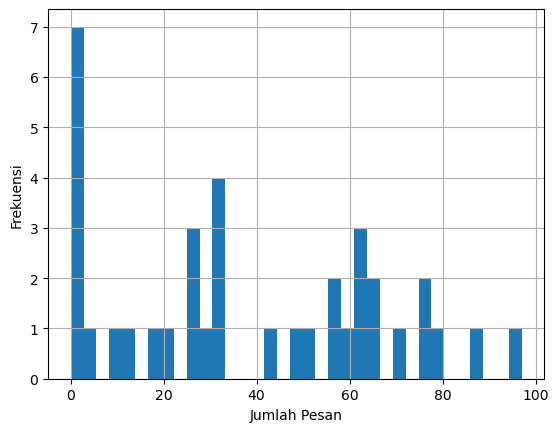

In [82]:
for plan in df_merged['plan'].unique():
    print(plan)
    df_text = df_merged.loc[df_merged['plan'] == plan]['total_messages']
    print('Rata-rata Jumlah Pesan : {:.2f}'.format(df_text.mean()))
    print('Standar Deviasi : {:.2f}'.format(np.std(df_text)))
    df_text.hist(bins=35)
    
    plt.xlabel('Jumlah Pesan')
    plt.ylabel('Frekuensi')
    plt.show()

Dari kedua histogram diatas, kedua titik puncak berada dikisaran yang sama, sekitar sebanyak 10 pesan dari masing-masing paket. Namun distribusi jumlah pesan cukup jauh berbeda, dimana paket ultimate hingga 175 pesan, sedangkan paket surf mencapai 275 pesan. Mengingat, rata-rata paket surf lebih kecil dari pada paket ultimate, kemungkinan jumlah pesan yang banyak pada paket surf hanyalah outlier, sebab frekuensinya yang sangat sedikit sehingga tidak begitu mempengaruhi nilai rata-rata. Terdapat juga nilai data `Unknown` yang frekuensi jumlah datanya sangat sedikit.  

Membuat grafik boxplot untuk memvisualisasikan distribusi jumlah pesan lebih jelas.

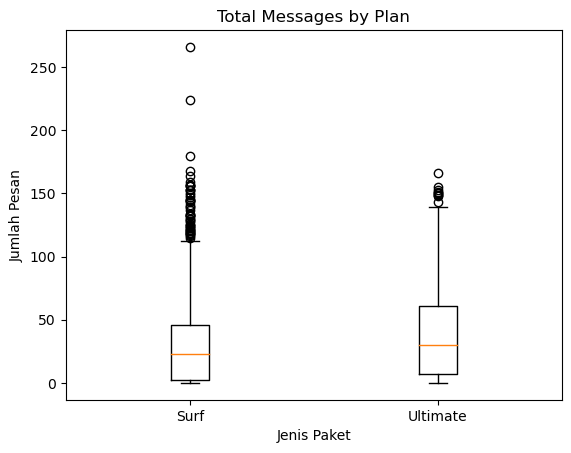

In [83]:
plt.boxplot([df_merged[df_merged['plan'] == 'surf']['total_messages'], 
             df_merged[df_merged['plan'] == 'ultimate']['total_messages']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Jenis Paket')
plt.ylabel('Jumlah Pesan')
plt.title('Total Messages by Plan')
plt.show()

Dari grafik boxplot diatas, masing-masing pengguna dari tiap paket memiliki jumlah pesan yang cenderung berbeda. Median pada paket surf lebih rendah dari pada paket ultimate, namun, distribusi jumlah pesan paket surf lebih tinggi dibanding paket ultimate, yang mana pengguna paket surf mengirimkan pesan dengan jumlah yang lebih banyak mencapai lebih dari 250 pesan.

### Internet

Membuat diagram batang untuk membandingkan rata-rata traffic internet per bulan dari tiap jenis paket.

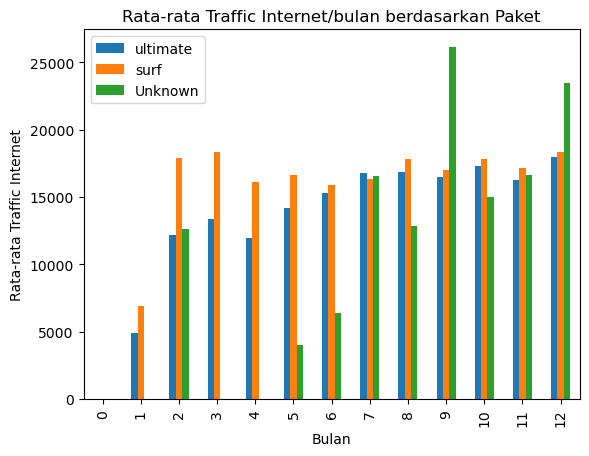

In [84]:
monthly_mb_mean = df_merged.pivot_table(values='total_mb', index=['month', 'plan'], aggfunc='mean')
monthly_mb_mean = monthly_mb_mean.reindex(['surf', 'ultimate', 'Unknown'], level='plan')
monthly_mb_mean.unstack().plot(kind='bar')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Traffic Internet')
plt.title('Rata-rata Traffic Internet/bulan berdasarkan Paket')

plt.legend(df_merged['plan'].unique())
plt.show()

Dari grafik diatas, rata-rata traffic internet dari paket surf cenderung lebih banyak dibandingkan paket ultimate di tiap bulannya. Namun terdapat juga nilai data yang tidak diketahui jenis paketnya, untuk mengetahui frekuensi distribusinya, akan dilihat pada histogram. 

Membuat histogram untuk membandingkan frekuensi traffic internet tiap paket, serta menghitung masing-masing mean dan standar deviasinya.  

ultimate
Rata-rata Traffic Internet (dalam MB) : 17157.28
Standar Deviasi : 7860.49


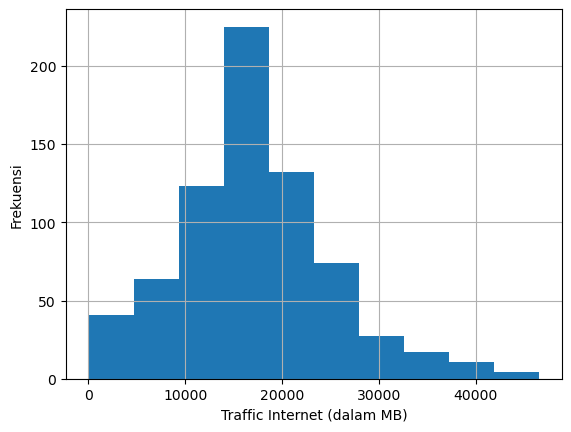

surf
Rata-rata Traffic Internet (dalam MB) : 16377.41
Standar Deviasi : 7949.34


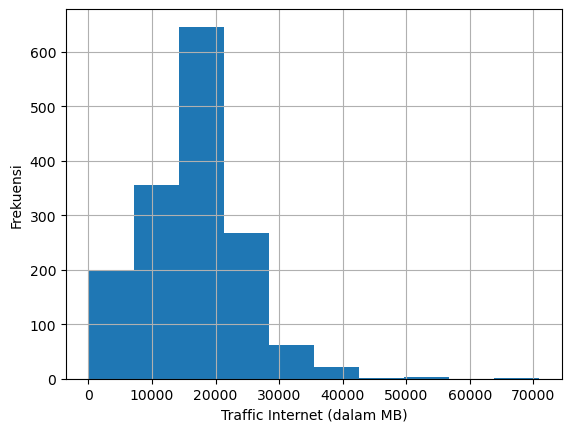

Unknown
Rata-rata Traffic Internet (dalam MB) : 16816.68
Standar Deviasi : 14455.50


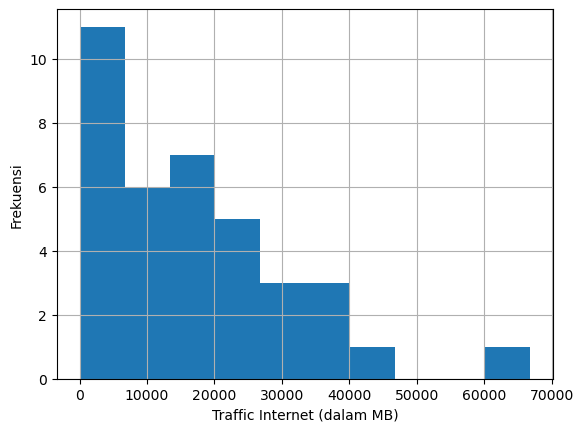

In [85]:
for plan in df_merged['plan'].unique():
    print(plan)
    df_mb = df_merged.loc[df_merged['plan'] == plan]['total_mb']
    print('Rata-rata Traffic Internet (dalam MB) : {:.2f}'.format(df_mb.mean()))
    print('Standar Deviasi : {:.2f}'.format(np.std(df_mb)))
    df_mb.hist()
    
    plt.xlabel('Traffic Internet (dalam MB)')
    plt.ylabel('Frekuensi')
    plt.show()

Dari kedua histogram diatas, kedua titik puncak berada dikisaran yang relatif sama, sekitar 19000 MB dari masing-masing paket. Namun distribusi traffic internet cukup jauh berbeda, dimana paket ultimate hingga 45000 MB, sedangkan paket surf mencapai 70000 MB. Mengingat, rata-rata paket surf lebih kecil dari pada paket ultimate, kemungkinan rentang distribusi yang banyak pada paket surf hanyalah outlier, sebab frekuensinya yang sangat sedikit sehingga tidak begitu mempengaruhi nilai rata-rata. Terdapat juga nilai data `Unknown` yang frekuensi jumlah datanya sangat sedikit.

Membuat grafik boxplot untuk memvisualisasikan distribusi traffic internet agar  lebih jelas.

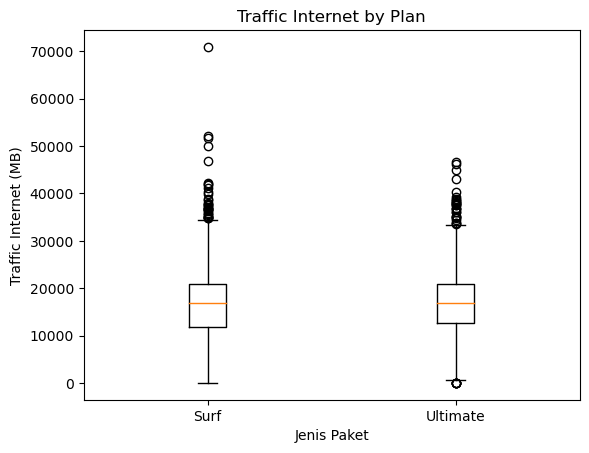

In [86]:
plt.boxplot([df_merged[df_merged['plan'] == 'surf']['total_mb'], 
             df_merged[df_merged['plan'] == 'ultimate']['total_mb']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Jenis Paket')
plt.ylabel('Traffic Internet (MB)')
plt.title('Traffic Internet by Plan')
plt.show()

Dari grafik boxplot diatas, masing-masing pengguna dari tiap paket memiliki distribusi traffic internet yang cenderung sama. Namun, paket surf terlihat jelas memiliki nilai outlier yang sangat jauh dikisaran 70000 MB yang membuat rentang distribusinya jauh lebih besar. Selain itu, direntang 35000-45000 MB paket surf memiliki rentang distribusi yang lebih banyak dibanding paket ultimate, yang menandakan pengguna paket surf memiliki traffic internet yang lebih besar.

## Pendapatan

Membuat diagram batang untuk membandingkan pendapatan per bulan dari tiap jenis paket.

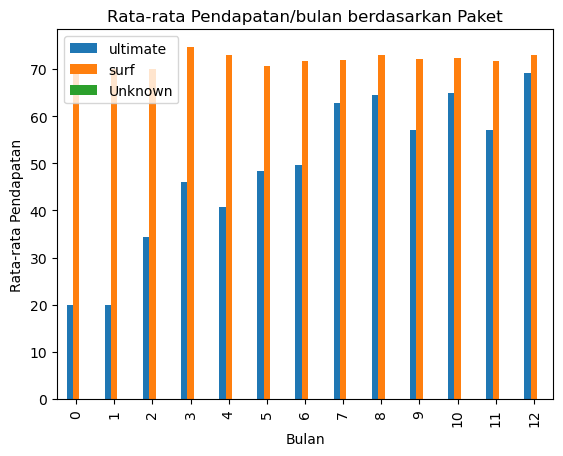

In [87]:
income_mean = df_merged.pivot_table(values='monthly_income', index=['month', 'plan'], aggfunc='mean')
income_mean = income_mean.reindex(['surf', 'ultimate', 'Unknown'], level='plan')
income_mean.unstack().plot(kind='bar')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Pendapatan')
plt.title('Rata-rata Pendapatan/bulan berdasarkan Paket')

plt.legend(df_merged['plan'].unique())
plt.show()

Dari grafik diatas, rata-rata pendapatan dari paket surf lebih banyak dibandingkan paket ultimate di tiap bulannya. Bahkan di tiga bulan pertama pendapatan paket surf dua kali lipat lebih banyak (bahkan lebih) dari paket ultimate. Hal ini mengindikasikan bahwa pengguna paket surf menghabiskan biaya yang lebih banyak dibandingkan pengguna paket ultimate. 

Membuat histogram untuk membandingkan frekuensi pendapatan dari tiap paket, serta menghitung masing-masing mean dan standar deviasinya.  

ultimate
Rata-rata Pendapatan : 72.26
Standar Deviasi : 11.31


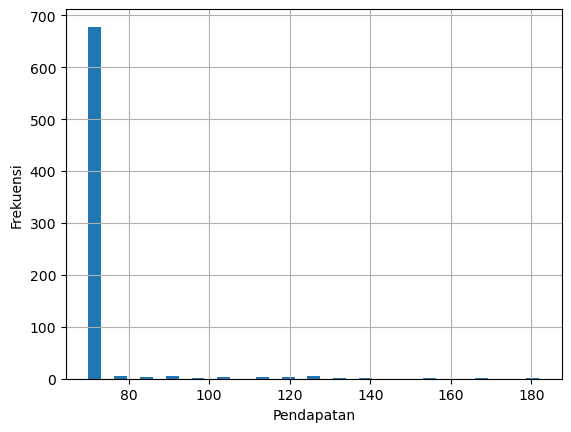

surf
Rata-rata Pendapatan : 59.82
Standar Deviasi : 53.42


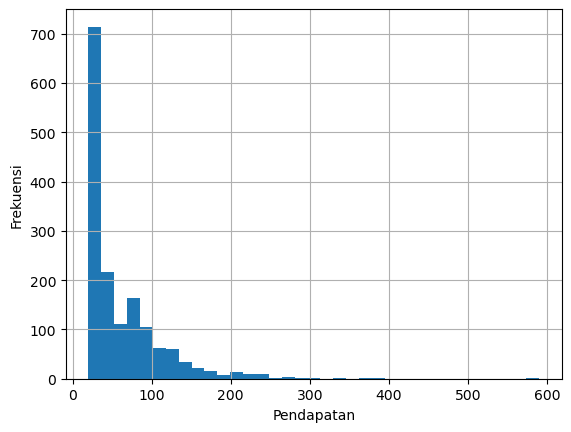

In [88]:
for plan in df_merged[df_merged['plan'] != 'Unknown']['plan'].unique():
    print(plan)
    df_income = df_merged.loc[df_merged['plan'] == plan]['monthly_income']
    print('Rata-rata Pendapatan : {:.2f}'.format(df_income.mean()))
    print('Standar Deviasi : {:.2f}'.format(np.std(df_income)))
    df_income.hist(bins=35)
    
    plt.xlabel('Pendapatan')
    plt.ylabel('Frekuensi')
    plt.show()

Pada histogram paket ultimate, kebanyakan nominal pendapatan cenderung sama yang berada dikisaran angka 70. Meski terdapat rentang lain yang mencapai angka 180, namun disebabkan frekuensinya yang sangat kecil, tidak begitu mempengaruhi nilai rata-rata, yaitu 72.26. Sedangkan pada paket surf, puncaknya berada dikisaran 20 dengan distribusi nilai yang cukup banyak hingga rentang 200. Hal ini sejalan dengan grafik batang yang ditampilkan sebelumnya dimana para pengguna paket surf mengeluarkan lebih banyak biaya dari pada paket ultimate. Namun demikian, rata-rata paket ultimate tetap lebih besar dari pada paket surf, maka dari itu, dibutuhkan pengujian statistik lebih lanjut untuk menguji hipotesis pada proyek ini. 

Membuat grafik boxplot untuk memvisualisasikan distribusi pendapatan serta data statisik dari tiap paket untuk pemeriksaan lebih lanjut.

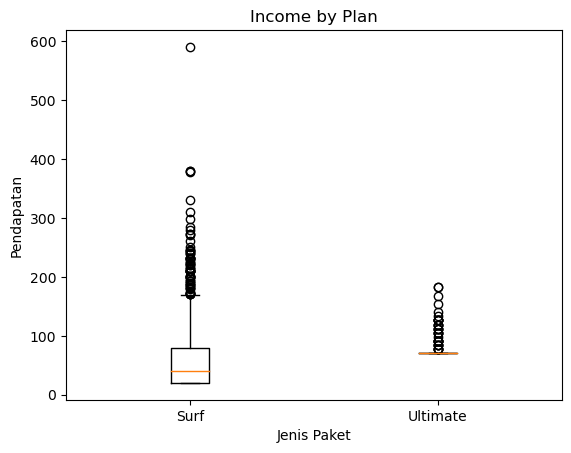

ultimate
count    718.000000
mean      72.261838
std       11.313880
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: monthly_income, dtype: float64
surf
count    1557.000000
mean       59.816262
std        53.441913
min        20.000000
25%        20.000000
50%        40.150000
75%        80.000000
max       590.370000
Name: monthly_income, dtype: float64


In [89]:
plt.boxplot([df_merged[df_merged['plan'] == 'surf']['monthly_income'], 
             df_merged[df_merged['plan'] == 'ultimate']['monthly_income']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Jenis Paket')
plt.ylabel('Pendapatan')
plt.title('Income by Plan')
plt.show()

for plan in df_merged[df_merged['plan'] != 'Unknown']['plan'].unique():
    print(plan)
    income_describe = df_merged[df_merged['plan'] == plan]['monthly_income'].describe()
    print(income_describe)

Dari grafik boxplot diatas, pendapatan dari paket ultimate cenderung sama, sebab nilainya berkumpul disatu titik yang sama. Hal ini kemungkinan disebabkan oleh jumlah paket gratis pada paket ini yang cukup besar untuk masing-masing paket SMS, panggilan, dan internet, sehingga kebanyakan pengguna tidak perlu membayar extra charge untuk pemakaian diluar paket gratis yang bernilai USD 70/bulan, yang mana nilai ini setara dengan rata-rata serta nilai Q1 hingga Q3 paket ultimate.

Sedangkan paket surf, memiliki rentang distribusi yang lebih lebar dimana pada rentang 180-300 nilainya cukup banyak. Ini menandakan pengguna paket surf menghabiskan biaya lebih banyak dalam pemakaian paketnya. Dan disini juga terdapat nilai outlier yang cukup jauh pada rentang 600, yang menyebabkan nilai mean lebih besar dari pada median dengan selisih yang cukup besar.

## Menguji Hipotesis Statistik

Menguji hipotesis bahwa pendapatan rata-rata dari paket prabayar Ultimate dan Surf berbeda.

Untuk membandingkan rata-rata dari dua populasi statistik yang berbeda, metode st.ttest_ind() akan digunakan, dengan hipotesis dibawah ini : 

Hipotesis Nol (H0): Pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf tidak berbeda.

Hipotesis Alternatif (H1): Pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda.

In [90]:
surf_user_income = df_merged['monthly_income'][df_merged['plan'] == 'surf'] 
ultimate_user_income = df_merged['monthly_income'][df_merged['plan'] == 'ultimate']

alpha = 0.05

results = st.ttest_ind(surf_user_income, ultimate_user_income, equal_var = True) 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 7.767196276576814e-10
Kita menolak hipotesis nol


Analisa diatas menunjukan bahwa pendapatan rata-rata dari paket prabayar Surf dan Ultimate memang berbeda. Hal ini kemungkinan disebabkan oleh syarat dan kondisi paket yang sangat berbeda, dan menyebabkan pengguna dari masing-masing paket memiliki total biaya yang dikeluarkan pun berbeda, serta, bergantung juga pada aktifitas para pengguna dalam pemakaian paket itu sendiri apakah masih termasuk kedalam paket gratis atau tidak.

Menguji hipotesis bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Hipotesis Nol (H0): Pendapatan rata-rata dari pengguna di wilayah NY-NJ dan pengguna di wilayah lain tidak berbeda.

Hipotesis Alternatif (H1): Pendapatan rata-rata dari pengguna di wilayah NY-NJ dan pengguna di wilayah lain berbeda.

In [91]:
NYNJ_user_income = df_merged['monthly_income'][df_merged['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'] 
nonNYNJ_user_income = df_merged['monthly_income'][df_merged['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

alpha = 0.05

results = st.ttest_ind(NYNJ_user_income, nonNYNJ_user_income, equal_var = True) 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.06600199795681645
Kita tidak dapat menolak hipotesis nol


Analisa diatas menunjukan bahwa data yang dimiliki tidak dapat membuktikan bahwa pendapatan rata-rata pengguna di wilayah NY-NJ dan di wilayah lainnya berbeda. Hal ini kemungkinan disebabkan oleh perbedaan kota para pengguna bukanlah faktor yang mempengaruhi perilaku konsumsi paket layanan. Perlu dilakukan penyelidikan lainnya untuk membandingkan perilaku para pengguna dari berbagai kota.

## Kesimpulan Umum

Proyek ini bertujuan untuk menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan, serta melakukan pengujian dua hipotesis, yaitu :
- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Tahap awal pada proyek ini adalah melakukan pra-premosesan data untuk menangani nilai yang hilang, dan memperbaki tipe serta kualitas data pada lima table data yang berbeda. Terdapat nilai yang hilang pada kolom `churn_date` pada table data Pengguna, sebab kolom berisikan informasi pengguna berhenti menggunakan paket, dan untuk pengguna aktif nilai menjadi Nan. Untuk mengisi nilai yang hilang pada kolom ini digunakan nilai yang sama dari kolom `reg_date`. Selain itu, table data Panggilan memiliki durasi 0,0 menit yang kemungkinan disebabkan oleh panggilan tak terjawab. Untuk mendapatkan data yang lebih relevan, durasi panggilan 0,0 menit dihapus.

Tahap selanjutnya adalah dilakukan penambahan kolom pada masing-masing table data yang menginformasikan durasi panggilan, jumlah pesan, dan traffic internet setiap bulannya. Untuk mendapatkan nominal pendapatan bulanan, seluruh data ini digabungkan dengan table data Pengguna, dengan cara menjumlahkan biaya paket bulanan serta biaya extra yang harus dibayar pengguna diluar paket.

Di tahap akhir dilakukan analisa data serta pengujian hipotesis, dengan kesimpulan sbb :

1. Mempelajari Perilaku Pengguna dari setiap aktifitas : SMS, Panggilan, dan Traffic Internet
Pada tahap ini ditemukan bahwa perilaku pengguna dari kedua paket prabayar cenderung mirip. Hanya terdapat beberapa perbedaan signifikan dalam aktifitas pengguna, seperti pada beberapa bulan tertentu jumlah pesan yang dikirimkan serta traffic internet berbeda. Namun, secara keseluruhan pengguna dari masing-masing paket cenderung memiliki aktifitas yang serupa. 

2. Membandingkan Pendapatan Bulanan dari Tiap Paket:
Dari masing-masing grafik yang dihasilkan, pendapatan Paket Surf memiliki rentang yang lebih besar dibandingkan paket Ultimate. Hal ini mengindikasikan pengguna paket Surf mengeluarkan biaya yang lebih besar dari pada pengguna paket Ultimate, yang erat kaitannya disebabkan oleh syarat dan kondisi dari paket tersebut.

3. Pengujian Hipotesis

Terdapat dua hipotesis yang diuji pada proyek ini, yaitu :
- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Hasil dari hipotesis pertama adalah rata-rata pendapatan dari pengguna paket Ultimate dan paket Surf berbeda, yang kemungkinan disebabkan oleh syarat dan kondisi dari masing-masing paket yang sangat berbeda sehingga pengguna dari masing-masing paket perlu mengeluarkan nominal biaya yang berbeda tiap bulannya. Sedangkan untuk hipotesis kedua, data yang dimiliki tidak dapat membuktikan bahwa pendapatan rata-rata pengguna di wilayah NY-NJ dan di wilayah lainnya berbeda. Hal ini kemungkinan disebabkan oleh perbedaan kota para pengguna bukanlah faktor yang mempengaruhi perilaku konsumsi paket layanan.